# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Sridhar Ramesh Babu</font>

# Introduction

The aim of this assignment is to apply implement Least Sqaure & Least Mean Square to the dataset and to familiarize with Python & its various libraies like matplotlib, pandas and numpy. We learnt about abstract methods call and super class. We learnt how to build a generalise model for linear regression in python and to use the model for predicting. Later we learned how to visualise the predicted value with the actual value and learned to reduce the mean square error by performing normalisation.


# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

<h1>Regression Problem</h1>
<h2>Introduction of data for regression</h2>
Dataset used for regression is wine dataset where can predict either winery type or points from the dataset. 

<h3>Attributes</h3>
The data consists of 10 fields:

Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)<br/>
Title: the title of the wine review, which often contains the vintage if you're interested in extracting that feature<br/>
Variety: the type of grapes used to make the wine (ie Pinot Noir)<br/>
Description: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.<br/>
Country: the country that the wine is from<br/>
Province: the province or state that the wine is from<br/>
Region 1: the wine growing area in a province or state (ie Napa)<br/>
Region 2: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank<br/>
Winery: the winery that made the wine<br/>
Designation: the vineyard within the winery where the grapes that made the wine are from<br/>
Price: the cost for a bottle of the wine<br/>
Taster Name: name of the person who tasted and reviewed the wine<br/>
Taster Twitter Handle: Twitter handle for the person who tasted and reviewed the wine<br/>

<h2>Source of data</h2>

URL: https://www.kaggle.com/zynicide/wine-reviews

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


<h2>Reading of dataset</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("winemag-data_first150k.csv")

<h2>Preprocessing of data set</h2>

Removing columns which wont be having impact on the output 

In [2]:
df = df.drop('description',axis=1)
df = df.drop('region_2',axis=1)
df

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
5,Spain,Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
6,Spain,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
7,Spain,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
8,US,Silice,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Pinot Noir,Blue Farm


In [3]:
df = df.dropna()
df.isnull()

,country,designation,points,price,province,region_1,variety,winery
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [4]:
np.any(df.isnull())

False

Converting string to integers for data visualization

In [5]:
countryValues = list(df.country.unique())
designationValues = list(df.designation.unique())
provinceValues = list(df.province.unique())
region1Values = list(df.region_1.unique())
varietyValues = list(df.variety.unique())
wineryValues = list(df.winery.unique())

In [6]:
df['country'] = df['country'].apply(lambda x: countryValues.index(x))
df['designation'] = df['designation'].apply(lambda x: designationValues.index(x))
df['province'] = df['province'].apply(lambda x: provinceValues.index(x))
df['region_1'] = df['region_1'].apply(lambda x: region1Values.index(x))
df['variety'] = df['variety'].apply(lambda x: varietyValues.index(x))
df['winery'] = df['winery'].apply(lambda x: wineryValues.index(x))

C:\Users\sridh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sridh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sridh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [7]:
df

,country,designation,points,price,province,region_1,variety,winery
0,0,0,96,235.0,0,0,0,0
1,1,1,96,110.0,1,1,1,1
2,0,2,96,90.0,0,2,2,2
3,0,3,96,65.0,2,3,3,3
4,2,4,95,66.0,3,4,4,4
5,1,5,95,73.0,1,1,1,5
6,1,6,95,65.0,1,1,1,6
7,1,7,95,110.0,1,1,1,1
8,0,8,95,65.0,2,5,3,7
9,0,9,95,60.0,0,6,3,8


<h2>Visualization of data</h2>

(array([ 40061.,   6457.,      0.,   9995.,      0.,  13422.,   3899.,
             0.,    143.,   3307.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

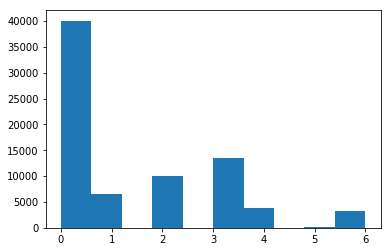

In [8]:
plt.hist(df.loc[:, 'country'])

## TIght layout plot
4 tight layout plot is used. This plot is used plotting one feature with all other feature available in X.

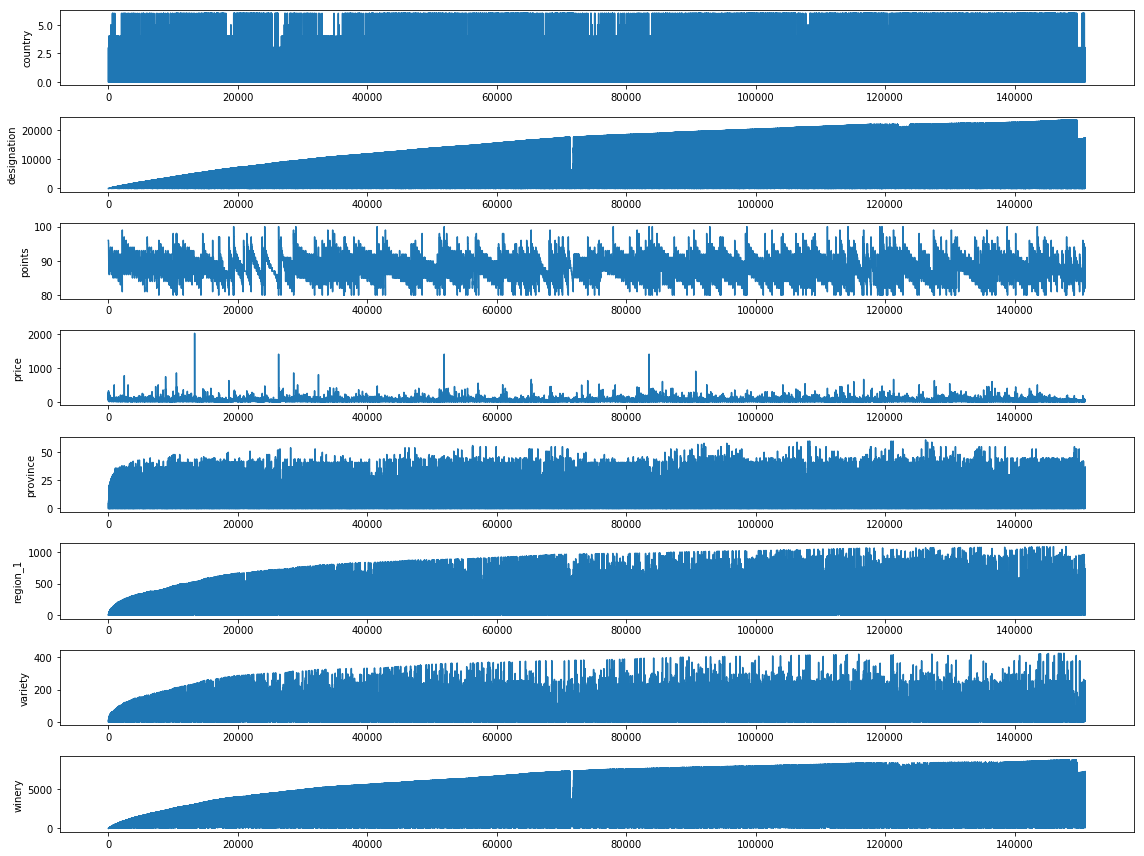

In [9]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()

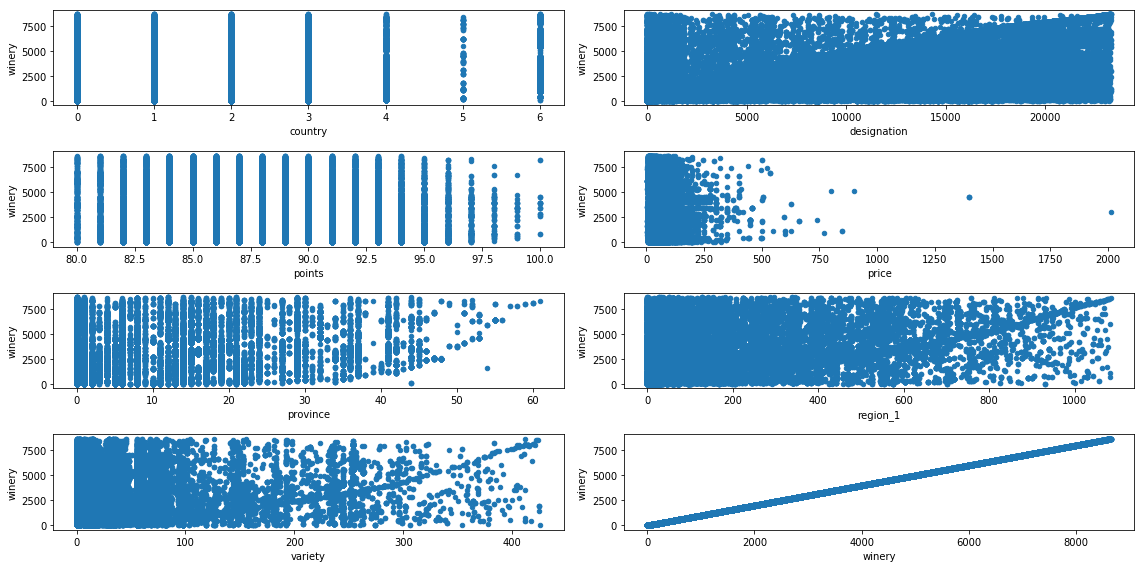

In [10]:
def area_scatter():
    fig, axes = plt.subplots(4,2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for i,c  in enumerate(df.columns.values):
        df.plot.scatter(c, 'winery', ax=axes[int(i/2), i%2])
    fig.tight_layout()
area_scatter()

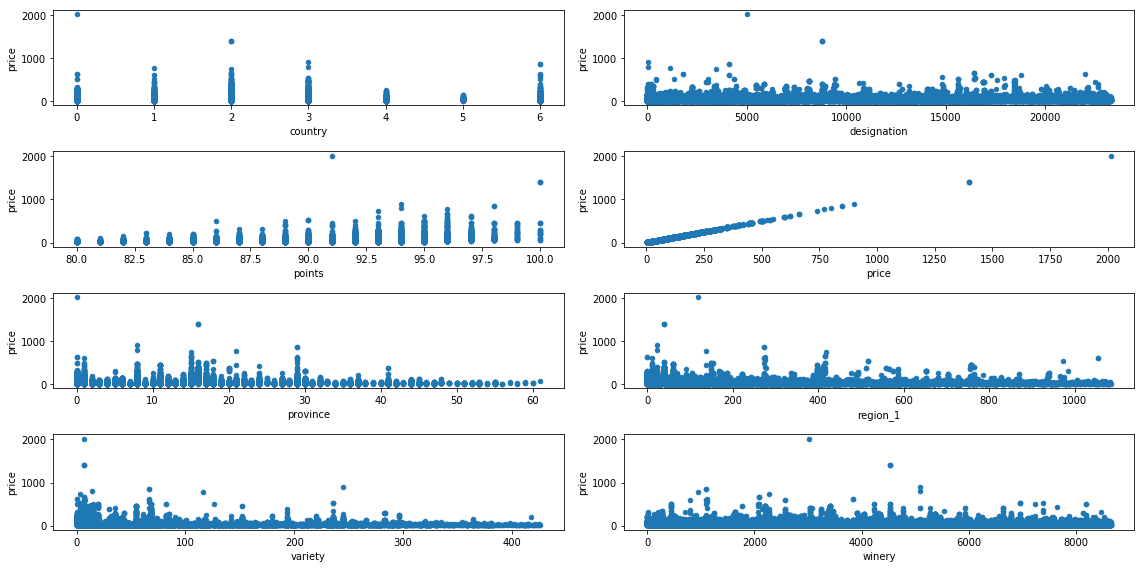

In [11]:
def area_scatter():
    fig, axes = plt.subplots(4,2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for i,c  in enumerate(df.columns.values):
        df.plot.scatter(c, 'price', ax=axes[int(i/2), i%2])
    fig.tight_layout()
area_scatter()

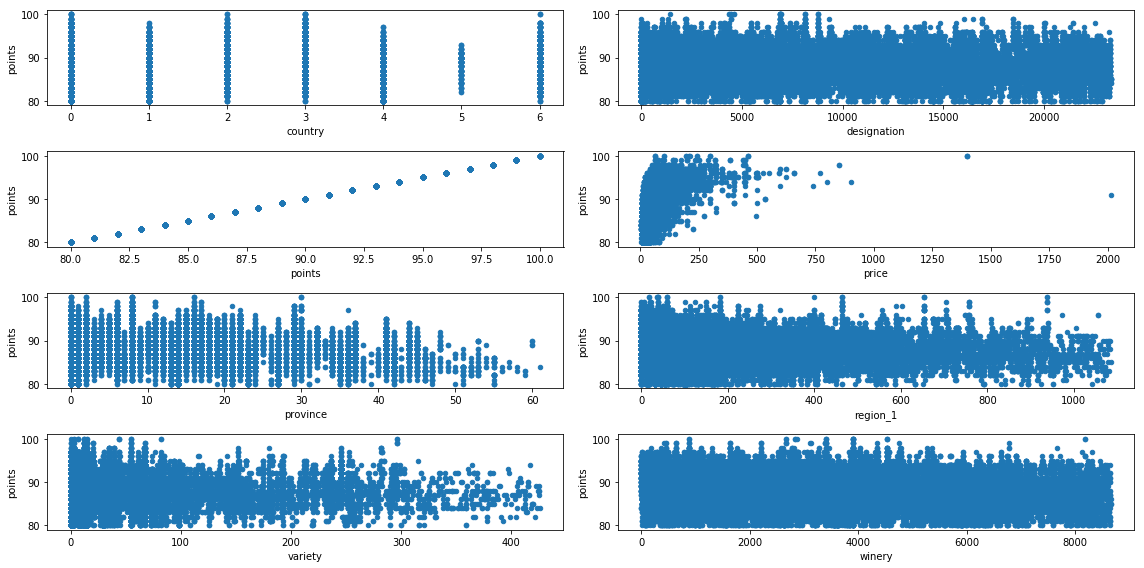

In [12]:
def area_scatter():
    fig, axes = plt.subplots(4,2)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for i,c  in enumerate(df.columns.values):
        df.plot.scatter(c, 'points', ax=axes[int(i/2), i%2])
    fig.tight_layout()
area_scatter()

## Scatter Matrix Plot or Pair Plot
This plot is used for finding the correlation between one variable with other. This is similar to heatmap.

C:\Users\sridh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':


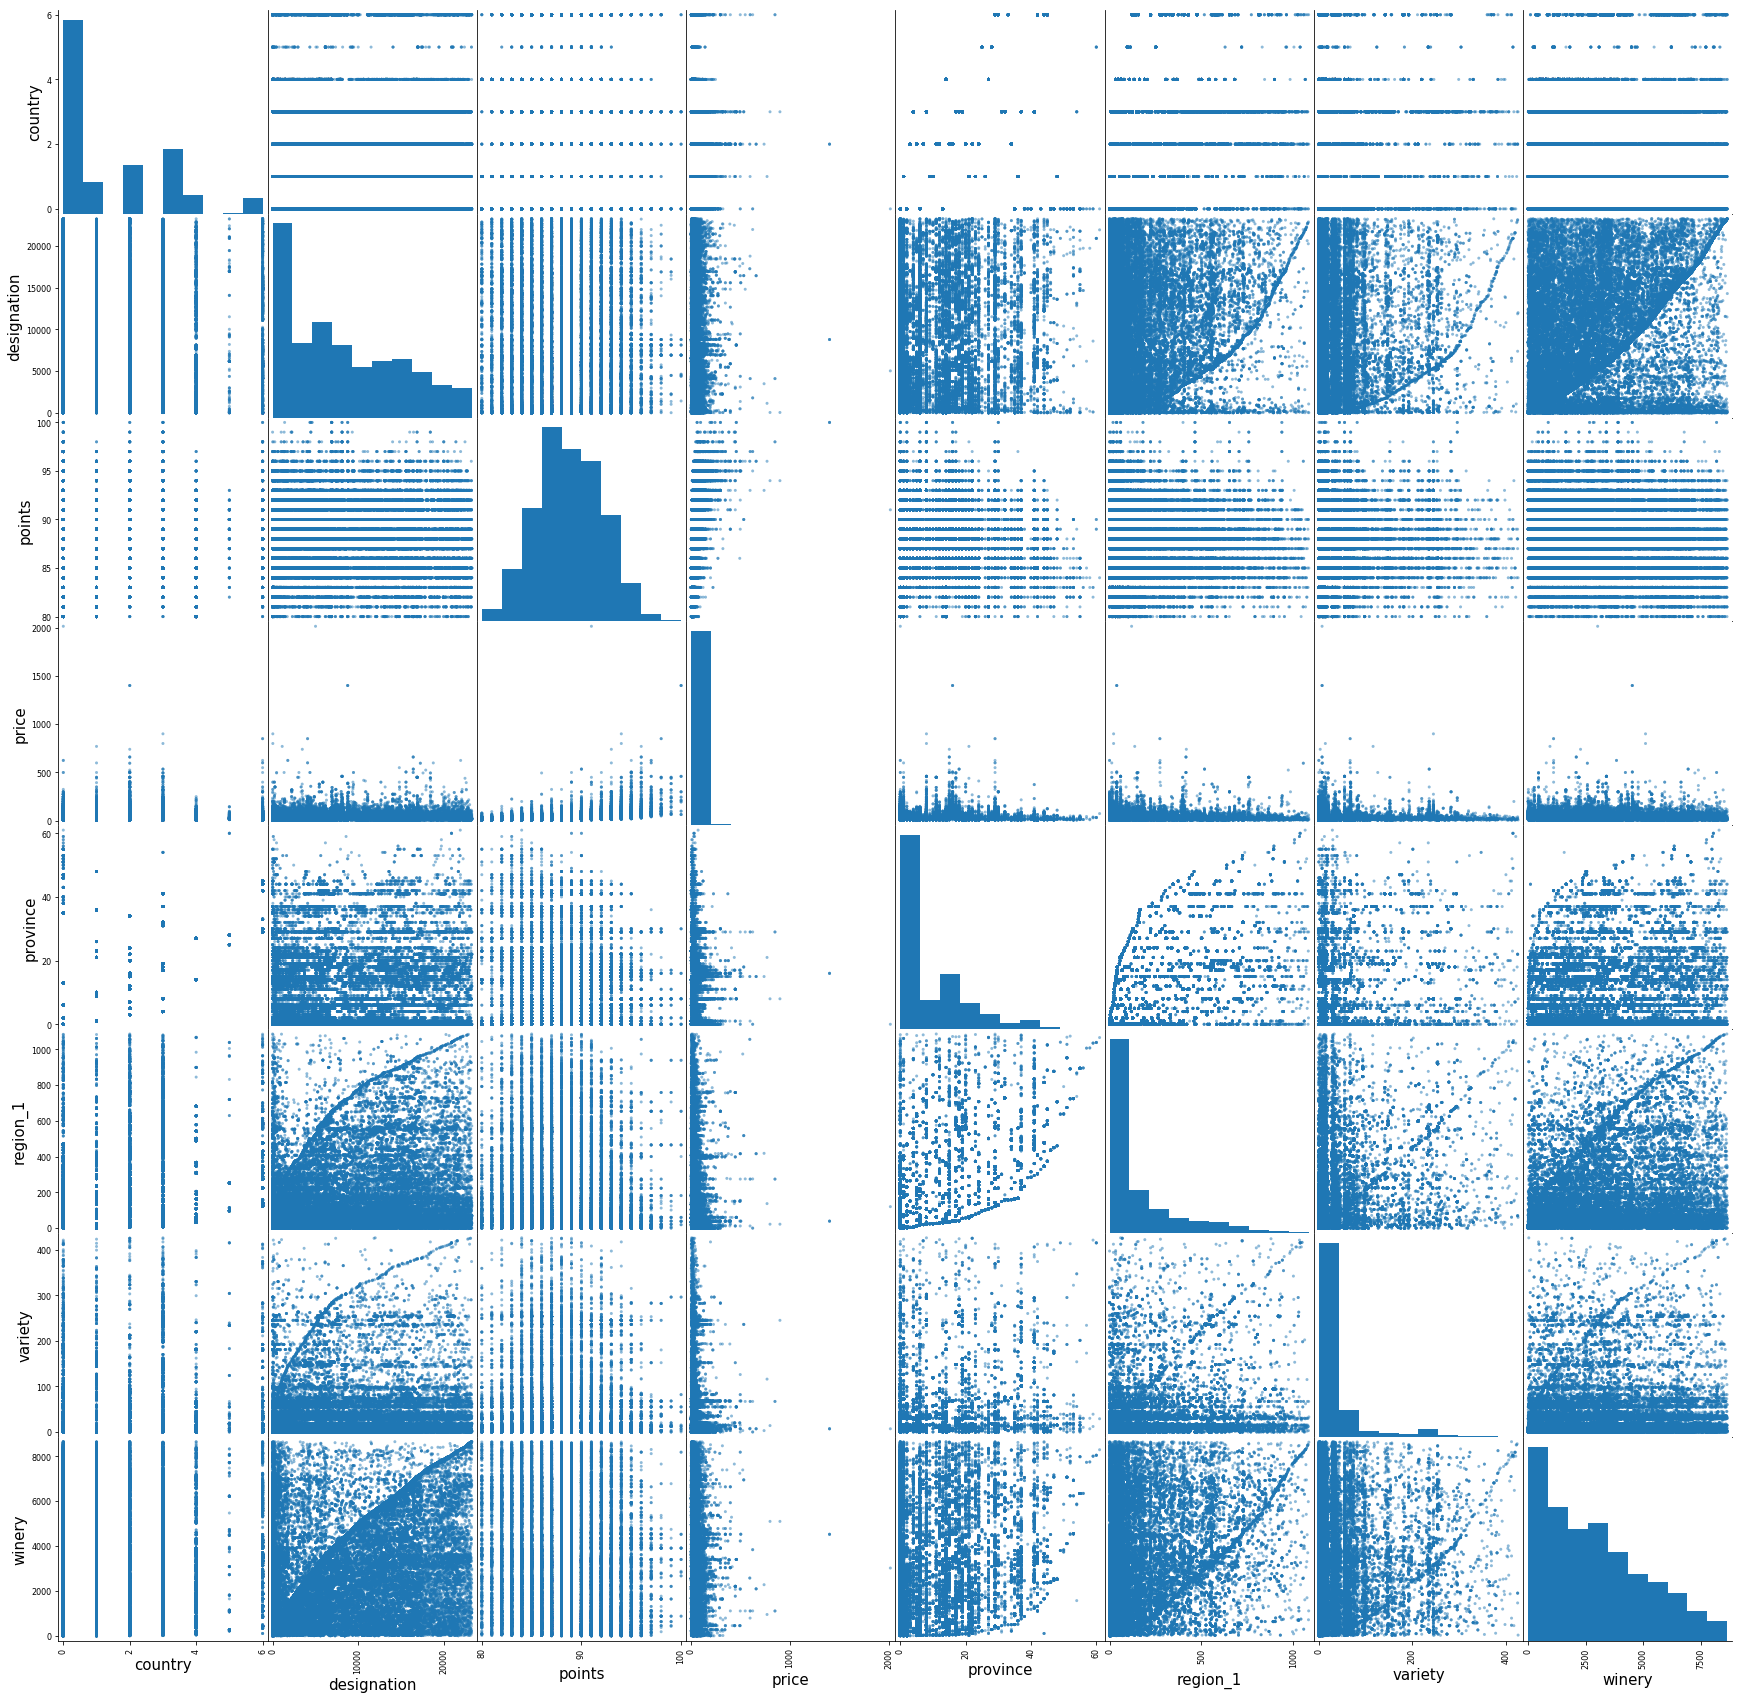

In [13]:
from pandas.tools.plotting import scatter_matrix
import matplotlib
matplotlib.rc('figure', figsize = (30, 30))
# Font size to 14
matplotlib.rc('font', size = 15)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
scatter_matrix(df)
plt.show()

## Correlation between variables using heatmap
This plot is used for finding the coorelation between one variable with other.

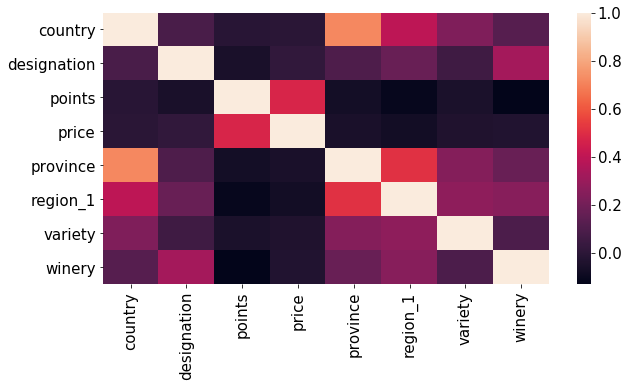

In [14]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

## Correlation between variables using matshow

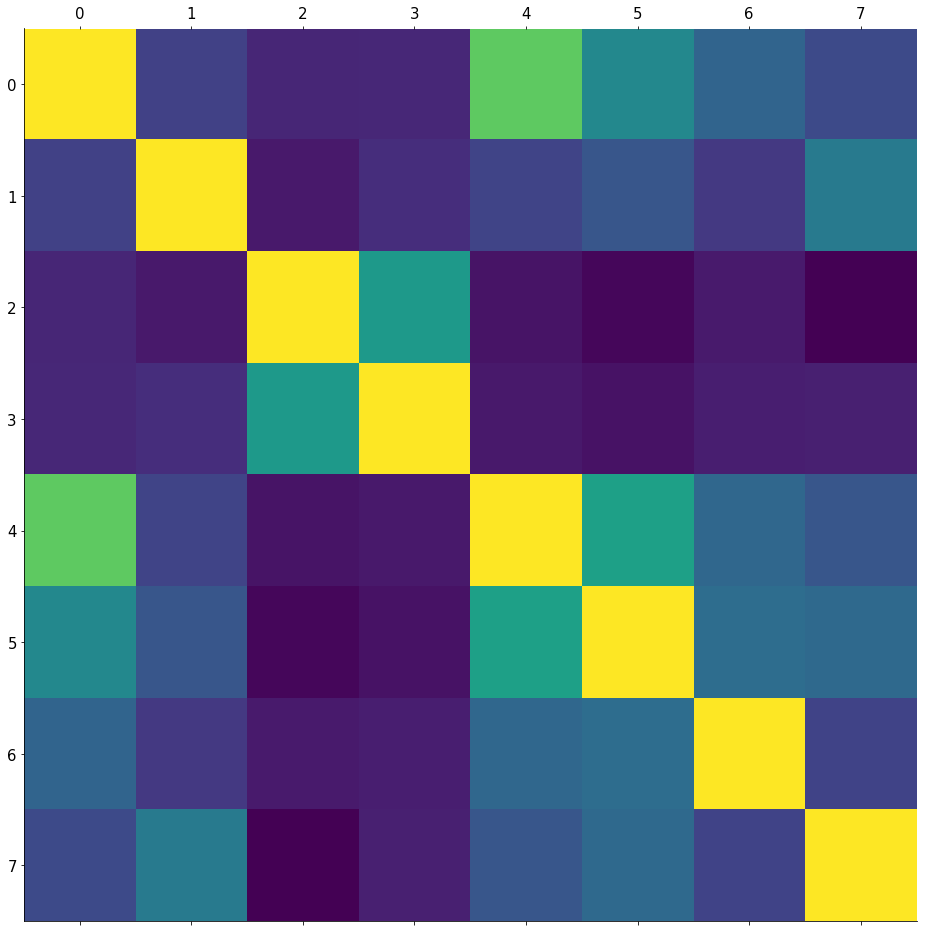

In [15]:
plt.figure(figsize=(20,10))
plt.matshow(df.corr())

<h2> Steps done before data visualization</h2>
1. There is no need to first drop any row as there is no junk data in the first row.
2. Column description, region_2 is dropped since this column has many empty rows and this attribute wont be having an impact on the output. 
3. Inorder to plot efficiently, all the columns which has string value is mapped to a integer value using lists


<h2>Preliminary Observation</h2>
1. Scatter matrix plot is plotted for finding coorelation between each feature and to find the value distribution of each field(histogram). Based on the plot, following observation are done
    * Prices, region_1 and variety is more left skewed. So if these attributes are used for finding model then there is probabilty of model being overfitting.
    * Points attribute has more distributed values and it has uniform distribution with other attributes.
    * All other features doesnt have uniform distribution
2. From the three tight plots, we can observe that predicting points and winery type from other features will provide more accurate results as the points feature has uniform distribution with other attributes and coorelation between the price and points are high. Thus price feature has more impact on the points compared to other features.
3. There are more data related to some countries but very less data for few other countries too. If the model uses country as its feature it will provide more accurate results for few type of countries and less accurate results for other countries.

# Linear Model

Linear model is generally defined as the dot prodct between the two vectors which are the input vector and weight vector.

Linear model can be achieved by 2 ways<br/>
1. Least Square Method
2. Least Mean Square Method


# Super Classs Definition

In [16]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

Abstract methods are created for implementing Linear Model and these abstract methods are defined in the inherited class

In [17]:
class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass
    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 




# Linear Regression Implementation


<h3>Least Square Method:</h3>
<br>
The least Square method is a form of mathematical regression that approximates the solution of a overdetermined system. In this method, over all solution minimizes the sum of squared deviations between the observed responses and the functional portion of the model. 

<h3>Least Mean Square Method:</h3><br>
Online learning is method is used for LMS and weight is updated step by step. This method is very usefull on large datasets. Weight is initialised randomly and the value 'w' gets updated at each step.

<h1>Implementation of the code</h1>

All the abstract mathods are defined in Least Sqaure Class and Least Mean Square Class.

<h3>Least Square Method:</h3><br>
In train: At the start we are initializing w with zeroes. Then we are adding 1 for x0 at the start of X matrix and we are finding 'w' using formula
$$
w = \big(X^\top X\big)^{-1} X^\top T
$$

In use: This method will calculate the dot product of the input vector X and weight vector w and calculate the predicted variable and return it.

<h3>Least Mean Square Method:</h3><br>

In train: We are calling tran_step method for each row of X and T

In train_step: Following steps are done
1. Removing the header part if it is present
2. Reshaping X to proper form
3. Reshaping T to proper form
4. Add 1 at the start of X matrix to represent x0
5. Checking whether w is initialized or not. If not initialized, w is initialized at the next step
6. w is calculated using below formula
<br>formula:
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

use: This method will calculate the dot product of the input vector X and weight vector w and calculate the predicted variable and return it.

<h2> Explanation of Code</h2>

The given two linear models help us to predict the best fit for the given data dataset. The Least Square performs well for the small datasets. Here, we calculate the squares of the deviations from the actual values. <br>
The Least Mean Square Method is useful for large datasets where we calculate the weight vector by step  by step method where we update the weight vector



# Least Squares

In [18]:
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.zeros((X.shape[1],1))
        self.w = np.linalg.inv(X.T@X)@X.T@T
        
    
    # apply the learned model to data X
    def use(self, X):
        self._check_matrix(X, 'X')
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X@self.w



# Least Mean Squares


In [19]:

import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)  
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(X.shape[0]):
            self.train_step(X[i],T[i])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.array(x)
        x = x.reshape(1,x.size)
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        t = t.reshape(t.size,1)
        if(self.w is None):
            self.w = np.zeros((x.shape[1],1))
        self.w -= self.alpha*(x@self.w - t)*x.T
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X@self.w


        
# Usage Examples

## HERE follow are for my code tests.


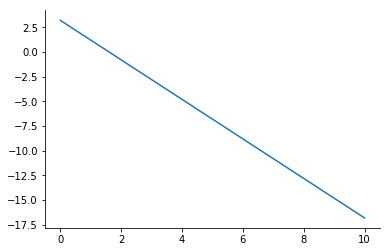

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline


X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))


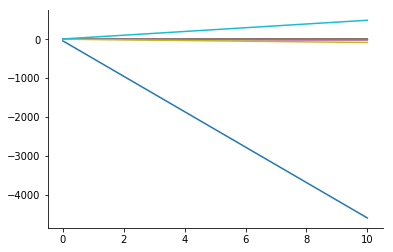

In [21]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))


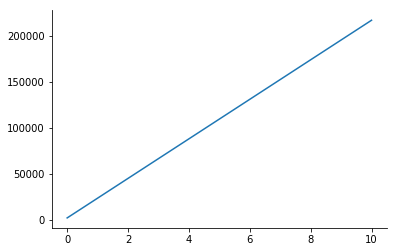

In [22]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

LS and LMS model is implemented for Wine dataset to predict the price value using other attributes.

## Least Square Implementation

Price field is dropped from X matrix and used as target attribute

In [23]:
T = df.iloc[:,3].as_matrix()
T = T.reshape(T.size,1)
X = df
X = X.drop('price',axis=1)

In [24]:
Tlog = np.log(T + 1)

LS model is implemented and 'w' value is found using LS model

In [25]:
ls = LinearRegress()
ls.train(X, Tlog)

'w' value is used for predicting the expected price value and error between predicted and expected value is found

In [26]:
Y = ls.use(X)

E = Tlog-Y
pd.DataFrame(E).describe()

,0
count,7.728400e+04
mean,4.817193e-13
std,4.985400e-01
min,-1.612826e+00
25%,-3.582184e-01
50%,-4.427079e-02
75%,3.110819e-01
max,3.819134e+00


In [27]:
np.mean((Tlog - Y)**2)

0.24853889363860004

In [28]:
np.sqrt(np.mean((Tlog - Y)**2))

0.49853675254548691

We are plotting the predicted value with original value.

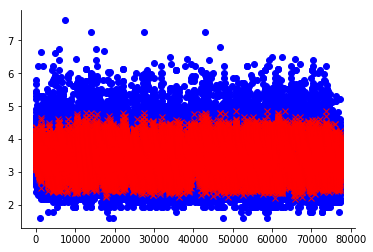

In [29]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

Seaborn plot is finding how far the expected and predicted value are differing

<class 'numpy.ndarray'>


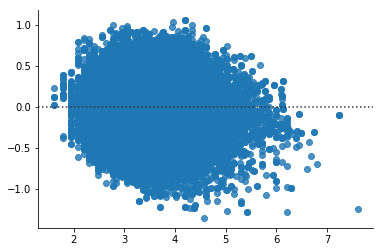

In [30]:
import seaborn
%matplotlib inline
print(type(np.array(Y)))
seaborn.residplot(np.array(Tlog),np.array(Y))

## Least Square Implementation with Normalisation of data

Above method is implented after normalising the data

In [31]:
T = df.iloc[:,3].as_matrix()
T = T.reshape(T.size,1)
dfX = df
dfX = dfX.drop('price',axis=1)
mu = dfX.mean() 
std = dfX.std()
ndfX = (dfX - mu) / std
ndfX.shape
ls = LinearRegress()
ls.train(ndfX, Tlog)

In [32]:
Y = ls.use(ndfX)

E = Tlog-Y
pd.DataFrame(E).describe()

,0
count,7.728400e+04
mean,-1.005816e-14
std,4.985400e-01
min,-1.612826e+00
25%,-3.582184e-01
50%,-4.427079e-02
75%,3.110819e-01
max,3.819134e+00


In [33]:
np.mean((Tlog - Y)**2)

0.24853889363860002

In [34]:
np.sqrt(np.mean((Tlog - Y)**2))

0.49853675254548691

After implenting normalisation, there is no improvement in the mean square error.

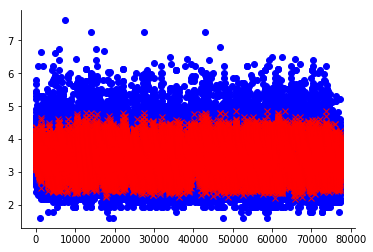

In [35]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

<class 'numpy.ndarray'>


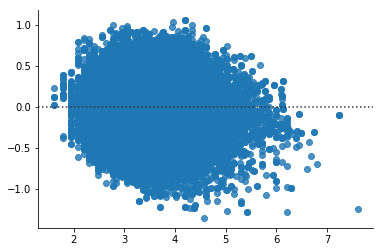

In [36]:
print(type(np.array(Y)))
seaborn.residplot(np.array(Tlog),np.array(Y))

## Least Mean Square Implementation with Normalisation of data

LMS is implented using online learning and models which was created above. 

In [37]:
ndfX = np.array(ndfX)
ndfX.shape

(77284, 7)

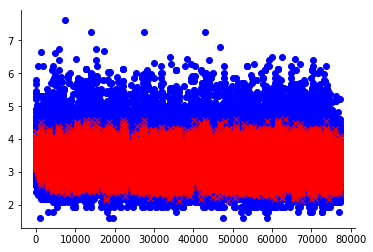

In [38]:
lms = LMS(0.001)
lms.train(ndfX, Tlog)
Y = lms.use(ndfX)
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

In [39]:
E = Tlog-Y
pd.DataFrame(E).describe()

,0
count,77284.000000
mean,0.120772
std,0.502429
min,-1.460030
25%,-0.245005
50%,0.075998
75%,0.436749
max,3.982501


In [40]:
np.mean((Tlog - Y)**2)

0.26701804743680335

In [41]:
np.sqrt(np.mean((Tlog - Y)**2))

0.51673789045976037

From the above error, we can come to conclusion that LMS provides approximate solution as it uses gradient descent for finding 'w'

<class 'numpy.ndarray'>


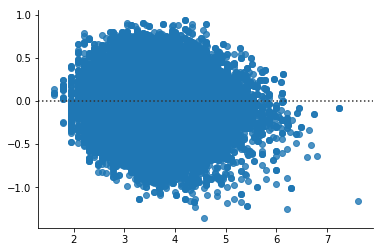

In [42]:
import seaborn
%matplotlib inline
print(type(np.array(Y)))
seaborn.residplot(np.array(Tlog),np.array(Y))

# Analysis / Comparison of algorithm
In this assignment, two models are compared. One is LS and other is LMS.
1. Least Square provides a decent mean square error as it implements exact linear model with no approximation. But this method is feasible only for small dataset as it has inverse function for calculating tetha or 'w'
2. Least Mean Square provides a approximate solution, as we can see the error mean square value is more compare LS model. Gradient Descent is used in this model. This method is used for large dataset as the inverse function is costly for LS model.
3. Even normalisation of data and performing Least Square is not improving the Error Means Square value. Thus it proves that normalisation will impact less in final prediction. But normalisation will help in LMS for gradient descent as it reduces time to reach optimal solution

# Extra Credit

- what is the most and least significant features for your data. <br>
According to the heat map which is created below, we can observe that the output variable "points" is highly correlated with the price and lease correlated attribute with price is "region_1".<br>
The lease or minimum significant variabes are "hum" and "weathersit".  

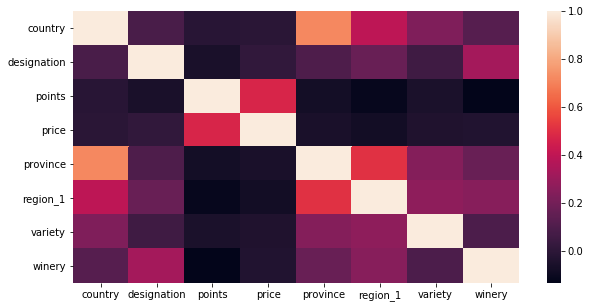

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

- what are the consequences if you remove those features from the model? 
please find the below training without these features.  

### Removing "region_1"

In [48]:
T = df.iloc[:,3].as_matrix()
T = T.reshape(T.size,1)
X = df
X = X.drop('price',axis=1)
X = X.drop('region_1',axis=1)
Tlog = np.log(T + 1)
ls = LinearRegress()
ls.train(X, Tlog)
Y = ls.use(X)

E = Tlog-Y
pd.DataFrame(E).describe()

,0
count,7.728400e+04
mean,-4.593616e-13
std,4.993338e-01
min,-1.620354e+00
25%,-3.600098e-01
50%,-4.519041e-02
75%,3.110648e-01
max,3.808144e+00


In [49]:
np.mean((Tlog - Y)**2)

0.2493310205317576

In [50]:
np.sqrt(np.mean((Tlog - Y)**2))

0.49933057239844386

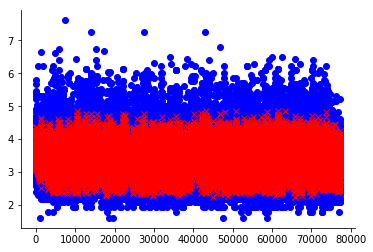

In [51]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

<class 'numpy.ndarray'>


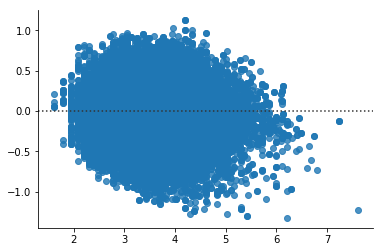

In [52]:
print(type(np.array(Y)))
seaborn.residplot(np.array(Tlog),np.array(Y))

From the above error, we can see that removing the lease significant attribute is not affecting the mean square error. But having this features reduces a bit of mean square error and increses accuracy.

### Removing "points"

In [53]:
T = df.iloc[:,3].as_matrix()
T = T.reshape(T.size,1)
X = df
X = X.drop('price',axis=1)
X = X.drop('points',axis=1)
Tlog = np.log(T + 1)
ls = LinearRegress()
ls.train(X, Tlog)
Y = ls.use(X)

E = Tlog-Y
pd.DataFrame(E).describe()

,0
count,7.728400e+04
mean,-4.968899e-15
std,6.245255e-01
min,-1.899576e+00
25%,-4.559424e-01
50%,-4.564103e-02
75%,3.903232e-01
max,4.134977e+00


In [54]:
np.mean((Tlog - Y)**2)

0.39002709139362374

In [55]:
np.sqrt(np.mean((Tlog - Y)**2))

0.62452148993739498

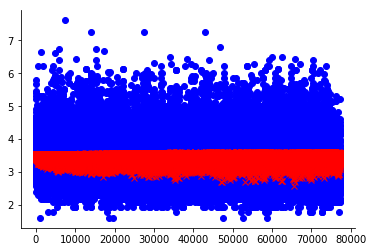

In [56]:
plt.plot(Tlog, 'ob')
plt.plot(Y, 'xr')

<class 'numpy.ndarray'>


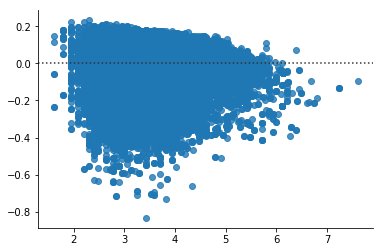

In [57]:
print(type(np.array(Y)))
seaborn.residplot(np.array(Tlog),np.array(Y))

From the above error, we can see that removing the most significant attribute is affecting the mean square error a lot. So it is important to use this feature for predicting in linear model

# Conclusions

This assignment helped us to create our own linear model in python which we can use in future as a base for linear regression <br>

I faced error in creating linear model for LMS. I need to do proper conversion and initalisation of w & x to resolve the error and make the model to work. I faced other challenges in preprocessing the data, data visualization like removing those rows which has '?' values, converting string to int type for displaying the data and displaying scatter matrix plot. 

By working on this assignment I have learned about basic steps of data preprocessing, data visualization using numpy, matplotlib and pandas and creaiting Linear Regression model in python.

# References
1. http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/Data%20Visualization.ipynb
2. https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
3. http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
4. https://www.kaggle.com/zynicide/wine-reviews

# Preliminary Test

In [58]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]
print(X[0].shape)

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


(2,)
training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 